<h1 style="text-align: center;font-weight: bold">Analyse de donnée</h1>
BILINGI Nathan</br>
VECCHIO Matias

## Objectif :
Rechercher une solution pour prédire la gravité d'un accident de voiture selon la règle :</br>
1-indemne, 2-Tué, 3-Hospitalisé, 4-BlesséLéger, à partir d'autres informations (lieu, véhicule, etc.)

## **SUMMARY** :
- [Librairies](#librairies)
- [Exploration de la base de donnée](#exploration-de-la-base-de-donnée)
- [Recherche d'un model](#recherche-dun-model)

<a id="librairies"></a>
### Librairies :
Nous allons avoir besoin des librairies standard suivantes : 
- Numpy v1.23.1
- Matplotlib v3.5.2
- Pandas v1.4.3
- Scikit-learn v1.1.1
- Tensorflow v2.8.2

In [1]:
%pip install numpy==1.23.1
%pip install matplotlib==3.5.2
%pip install pandas==1.4.3
%pip install scikit-learn==1.1.1
%pip install tensorflow==2.8.2

  Using cached numpy-1.23.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
scipy 1.7.1 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.23.1 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.23.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached numpy-1.22.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Fou

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn import datasets
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from datetime import datetime

2024-01-07 13:08:51.521293: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-07 13:08:51.521308: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<a id="exploration-de-la-base-de-donnée"></a>
### Exploration de la base de donnée :

Nous avons choisi <a href="https://www.data.gouv.fr/fr/datasets/r/8ef4c2a3-91a0-4d98-ae3a-989bde87b62a">la base de donnée annuelle des accidents corporels de la circulation routière de 2005 à 2022</a>

In [ ]:
dvf = pd.read_csv('./base_accidents_2021_short.csv', dtype={'hrmn':'str'})

In [ ]:
dvf

In [ ]:
dvf.describe()

Ce tableau n'est pas très parlant car on remarque que beaucoup de colonnes sont des données énumérés</br>
Il est alors compliqué de déterminée une moyenne ou autre relation dans ces données.

Nous pouvons tout de même remarquer que en moyenne les accidents impact plus de personne nées en 1983

In [ ]:
correlation_matrix = dvf.corr()
correlation_matrix

In [ ]:
dvf.shape

Les dimensions étant très grande, il est compliqué de s'y retrouver dans un tableau aussi grand, filtront un peu les informations :

In [ ]:
# On isole les correlations
for topic in correlation_matrix:
    for tmp in correlation_matrix:
        corr = correlation_matrix[tmp][topic]
        dist_corr = abs(corr)
        if(dist_corr > 0.3 and dist_corr != 1):
            print(topic, tmp, corr)

Malheuresement, même en isolant les données nous n'apprenont pas grand chose.</br>
Evidemment que la place dans le véhicule(place) et la catégorie utilisateur(catu) sont correlé,
le conducteur est forcément devant le volant, un piéton hors du véhicule.</br>
Même chose avec la localisation du piéton (locp)</br>
Et ainsi de suite.

In [ ]:
dvf['grav'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('degré de gravitée')
plt.ylabel('Nombre de valeurs')
plt.title('Répartition des différents gravités de blessures.')
plt.show()

L'exploration des données s'achève avec la récupération des différentes repartitions des degrés de blessure.
On peut voir que les degrés de blessures sont réparties en 5 catégories différentes et qu'il n'est pas possible d'être en dehors de ces catégories. Comme il y a un nombre limité de catégories alors on se retrouve dans un problème de classification, avec un label appartenant à un ensemble fini de valeurs possibles.

In [19]:
# TODO
# observation de grav -> donnée énumérée
# Et donc : classification -> transition

<a id="recherche-dun-model"></a>
### Recherche d'un model :

- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html">RidgeClassifier</a> : fonctionnement

Cet algorithme transforme le problème de classification en problème de régression en convertissant les cibles 
en des valeurs comprises entre -1 et 1.
Il créé une fonction par classe, puis, lorsqu'on lui donne une nouvelle donnée, il teste pour chaque fonction la probabilité que cette donnée appartienne à cette classe.
La probabilité la plus haute permet de savoir la classe prédite par l'algorithme.

- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html">NearestCentroid</a> : fonctionnement
(non supervisé, car utilise K-Mean)


On détermine la catégorie à laquelle un point appartient en regardant la catégorie à laquelle appartient son centroid le plus proche.
Pour déterminer la position des centroides, on initialise les n centroides (avec n le nombre de catégories) avec les coordonnées de n points choisit aléatoirement.
Ensuite, on met à jour les centroides en calculant la moyenne des distances des points par rapport à leur centroide le plus proche. Une fois que les centroides ne changent plus de place entre deux mises à jours on arrête les calculs.

- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">DecisionTree</a>

On prépare alors des outils (fonctions) pour nos tests, pratiquement indépendants du modèle étudié (il reste une différenciation entre l'exploitation de modèle crée avec tensorflow et les modèles plus classique de scikit-learn)

In [25]:
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.losses import SparseCategoricalCrossentropy

def print_result(f):
    """Fonction d'affichage des résultats de test_model et test_model_tensorflow.

    Args:
        f function: test_model ou test_model_tensorflow
    """
    def result(*args, **kwargs):
        print(args[0])
        score = f(*args, **kwargs)
        print(f"\t Mean accuracy: {score* 100}%")
        return score
    return result

@print_result
def test_model(model, obs, labels, n):
    """Fonction de test d'un model, par un score après n série d'entrainement puis tests.

    Args:
        model : Le modèle à tester
        obs : Nos observations
        labels : Nos labels
        n (int): le nombre de sessions entrainement/test

    Returns:
        int : l'accuracy moyenne des sessions de test.
    """
    test_score = []
    for _ in range(n):
        tmp = model
        train_x, tests_x, train_y, tests_y = train_test_split(obs, labels)
        tmp.fit(train_x, train_y)
        test_score.append(tmp.score(tests_x, tests_y))
    return np.mean(test_score)

@print_result
def test_model_tensorflow(model, obs, labels, n):
    """Fonction de test d'un model fait avec tensorflow.
    La méthode diffère un peu, au lieu d'une répétitions de tests indépendant dont on prend la moyenne.
    Le modèle suit une série de n entrainement pour ensuite s'évaluer sur les tests.

    Args:
        model : Le modèle à tester
        obs : Nos observations
        labels : Nos labels
        n (int): le nombre

    Returns:
        int : l'accuracy moyenne
    """
    test_score = []
    train_x, tests_x, train_y, tests_y = train_test_split(obs, labels)
    model.fit(train_x, train_y, epochs=n)
    test_score.append(model.evaluate(tests_x, tests_y)[1]) # sortie de la forme loss_value, accuracy --> on ne récupère que l'accuracy.
    return np.mean(test_score)

On prépare également une fonction pour lancer nos tests sur chaques modèles que nous voulons étudier et créer un graphe pour illustrer les résultats.

In [26]:
def test(tf_model, observations, labels, n):
    scores = []
    scores.append(test_model_tensorflow(tf_model,observations,labels, n))
    scores.append(test_model(RidgeClassifier(), observations, labels, n))
    scores.append(test_model(NearestCentroid(), observations, labels, n))
    scores.append(test_model(DecisionTreeClassifier(), observations, labels, n))
    
    scores_labels = ['TensorFlow','Ridge','NearestCentroid','DecisionTree']
    colors = ['blue', 'green', 'red', 'orange']
    plt.bar(scores_labels, [x * 100 for x in scores], color=colors)
    plt.xlabel('')
    plt.ylabel('Score (en %)')
    plt.title('Récapitulatif des scores')
    plt.ylim(0, 100)
    plt.show()
    return

On lance une 1ere série de test</br>
De manière naïve, on retire les données qui posent problème à la compilation (Not a Number et la colonne des heures)

In [31]:
n = 5
objectif = "grav"
observations = dvf.notna().drop(columns=[objectif, "hrmn"])
labels = dvf[objectif].map(lambda x: x +1)

Nous avons également essayé de créer un modèle avec Tensorflow, il ne possède pas beaucoup de layer car avec un jeu de donnée de dimensions 34, les entrainements devenaient vite très long.

In [28]:
tf_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(len(observations.columns),)),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax'),
])

tf_model.compile(
    optimizer='adam', 
    loss=SparseCategoricalCrossentropy(), 
    metrics=['accuracy']
)

Epoch 1/5
5814/5814 [==============================] - 5s 835us/step - loss: 1.0602 - accuracy: 0.4494
Epoch 2/5
5814/5814 [==============================] - 6s 987us/step - loss: 1.0509 - accuracy: 0.4527
Epoch 3/5
5814/5814 [==============================] - 6s 982us/step - loss: 1.0501 - accuracy: 0.4561
Epoch 4/5
5814/5814 [==============================] - 5s 783us/step - loss: 1.0496 - accuracy: 0.4579
Epoch 5/5
1938/1938 [==============================] - 2s 773us/step - loss: 1.0514 - accuracy: 0.4584
	 Mean accuracy: 45.83978354930878%
RidgeClassifier()
	 Mean accuracy: 45.75367647058823%
NearestCentroid()
	 Mean accuracy: 13.071787925696594%
DecisionTreeClassifier()
	 Mean accuracy: 45.968459752321984%


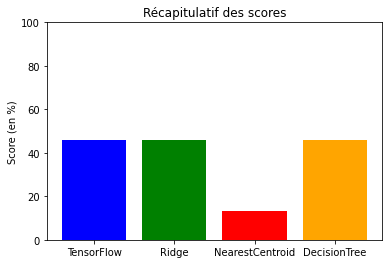

In [29]:
test(tf_model, observations, labels, n)

On peut voir qu'en ayant retiré certaines données, les algorithmes ont des performances peu impressionnantes :
ils sont trois à être aux alentours de 45% de prédictions corrects et le nearestCentroid est à 10%, mais ce dernier résultat s'explique par le fait qu'il n'est pas fait pour un apprentissage supervisé.


Test sans drop

In [34]:
#plutôt que de retirer les colonnes problématiques, on convertie les données pour qu'elles puissent être traitées
#l'heure sera convertie en un format numérique
# et les "na" vont être remplacé par des -1, une valeur neutre
n = 5
objectif = "grav"
#on recharge dvf à nouveau
dvf = pd.read_csv('./base_accidents_2021_short.csv', dtype={'hrmn':'str'})
dvf['hrmn'] = dvf['hrmn'].apply(lambda x: int(datetime.strptime(x,'%H:%M').strftime("%H%M%S")))
observations = dvf.drop(columns=[objectif])
observations.fillna(-1,inplace=True)
labels = dvf[objectif].map(lambda x: x +1)

On recrée le model avec Tensorflow

In [35]:
tf_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(len(observations.columns),)),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax'),
])

tf_model.compile(
    optimizer='adam', 
    loss=SparseCategoricalCrossentropy(), 
    metrics=['accuracy']
)

Epoch 1/5


2024-01-07 13:24:12.561287: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 49115880 exceeds 10% of free system memory.


5814/5814 [==============================] - 6s 900us/step - loss: 162.7601 - accuracy: 0.3866
Epoch 2/5
5814/5814 [==============================] - 6s 1ms/step - loss: 28.3496 - accuracy: 0.4076
Epoch 3/5
5814/5814 [==============================] - 5s 816us/step - loss: 1.0968 - accuracy: 0.4597
Epoch 4/5
5814/5814 [==============================] - 5s 780us/step - loss: 1.0807 - accuracy: 0.4599
Epoch 5/5
1938/1938 [==============================] - 2s 772us/step - loss: 1.0743 - accuracy: 0.4552
	 Mean accuracy: 45.51728665828705%
RidgeClassifier()
	 Mean accuracy: 53.32591589267286%
NearestCentroid()
	 Mean accuracy: 26.820175438596493%
DecisionTreeClassifier()
	 Mean accuracy: 73.88835139318884%


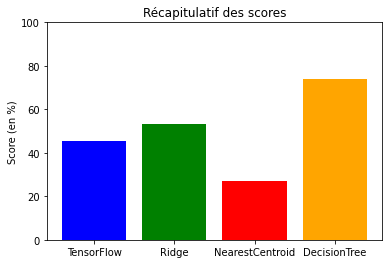

In [36]:
#on relance les tests
test(tf_model, observations, labels, n)

Les résultats des algorithmes sont améliorés grâce à la conservation des données d'entrée,
l'algorithme qui parvient à obtenir les meilleures performances est alors DecisionTree en avoisinant un score aux alentours de 73%.
Seul tensorflow n'a pas connu d'amélioration de performance avec l'ajout de nouvelles données en entrée.

## En bonus : RandomForest 

Il est possible d'utiliser le modèle RandomForest pour améliorer les résultats, mais cela à un coup qui est la vitesse d'exécution du programme, qui est très lente (plus de 4 minutes).

In [38]:
#prend plus de 4 minutes pour s'exécuter entièrement
from sklearn.ensemble import RandomForestClassifier

test_model(RandomForestClassifier(), observations, labels, n)

RandomForestClassifier()
	 Mean accuracy: 79.92002063983487%


0.7992002063983488

Comme on peut le voir ici, le RandomForest a une probabilité de 79% concernant "l'accuracy",
cependant son utilisation est très coûteuse.

## Conclusion

En conclusion, 
le problème présenté doit être résolu en utilisant un algortihme de classification supervisé ; afin de le traiter au mieux, le modèle le plus à même de réaliser les meillleures performances en termes de prédiction tout en restant relativement rapide est le modèle DecisionTree. 
Toutefois, il est important de préciser que le modèle RandomForest permet de réaliser des performances un peu meilleures (ont atteint le 79%) mais il réalise cette amélioration dans un temps beaucoup trop long pour être conservé comme choix idéal.